In [1]:
import pandas as pd 
import database
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMapWithTime

plt.style.use('ggplot')



In [2]:
df_accidents=pd.read_csv("Donnees/accidents-velos.csv",
                        low_memory=False)
df_points=pd.read_csv("Donnees/38185-points.csv",sep=",")

In [3]:
df_accidents.info()
df1=df_accidents[df_accidents["commune"]=="38185"]
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')
df1['date'] +=  pd.to_timedelta(df1.heure, unit='h')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65981 entries, 0 to 65980
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   identifiant accident        65981 non-null  int64  
 1   date                        65981 non-null  object 
 2   mois                        65981 non-null  object 
 3   jour                        65981 non-null  object 
 4   heure                       65515 non-null  float64
 5   departement                 65981 non-null  object 
 6   commune                     65981 non-null  object 
 7   lat                         65981 non-null  float64
 8   lon                         65713 non-null  float64
 9   en agglomeration            65981 non-null  object 
 10  type intersection           65979 non-null  object 
 11  type collision              65977 non-null  object 
 12  luminosite                  65981 non-null  object 
 13  conditions atmosperiques    659

/home/khalid/.local/share/virtualenvs/dangerosite_velo-kskA4bPm/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/khalid/.local/share/virtualenvs/dangerosite_velo-kskA4bPm/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
list(df1.columns)

['identifiant accident',
 'date',
 'mois',
 'jour',
 'heure',
 'departement',
 'commune',
 'lat',
 'lon',
 'en agglomeration',
 'type intersection',
 'type collision',
 'luminosite',
 'conditions atmosperiques',
 'type route',
 'circulation',
 'nb voies',
 'profil long route',
 'trace plan route',
 'largeur TPC',
 'largeur route',
 'etat surface',
 'amenagement',
 'situation',
 'categorie usager',
 'gravite accident',
 'sexe',
 'age',
 'motif deplacement',
 'existence securite',
 'usage securite',
 'obstacle fixe heurte',
 'obstacle mobile heurte',
 'localisation choc',
 'manoeuvre avant accident',
 'identifiant vehicule',
 'type autres vehicules',
 'manoeuvre autres vehicules',
 'nombre autres vehicules']

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 136 to 64862
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   identifiant accident        335 non-null    int64         
 1   date                        328 non-null    datetime64[ns]
 2   mois                        335 non-null    object        
 3   jour                        335 non-null    object        
 4   heure                       328 non-null    float64       
 5   departement                 335 non-null    object        
 6   commune                     335 non-null    object        
 7   lat                         335 non-null    float64       
 8   lon                         335 non-null    float64       
 9   en agglomeration            335 non-null    object        
 10  type intersection           335 non-null    object        
 11  type collision              335 non-null    object    

In [6]:
df1.isnull().sum().any()

True

In [7]:
list(df1.date.unique())

[numpy.datetime64('2005-01-13T07:00:00.000000000'),
 numpy.datetime64('2005-01-14T17:00:00.000000000'),
 numpy.datetime64('2005-01-25T09:00:00.000000000'),
 numpy.datetime64('2005-02-18T17:00:00.000000000'),
 numpy.datetime64('2005-03-30T17:00:00.000000000'),
 numpy.datetime64('2005-03-30T18:00:00.000000000'),
 numpy.datetime64('2005-03-30T10:00:00.000000000'),
 numpy.datetime64('2005-04-02T14:00:00.000000000'),
 numpy.datetime64('2005-04-07T10:00:00.000000000'),
 numpy.datetime64('2005-04-19T20:00:00.000000000'),
 numpy.datetime64('2005-04-21T16:00:00.000000000'),
 numpy.datetime64('2005-04-27T23:00:00.000000000'),
 numpy.datetime64('2005-05-09T11:00:00.000000000'),
 numpy.datetime64('2005-05-14T14:00:00.000000000'),
 numpy.datetime64('2005-05-25T08:00:00.000000000'),
 numpy.datetime64('2005-06-01T11:00:00.000000000'),
 numpy.datetime64('2005-06-06T16:00:00.000000000'),
 numpy.datetime64('2005-06-10T08:00:00.000000000'),
 numpy.datetime64('2005-06-10T15:00:00.000000000'),
 numpy.datet

In [8]:
pd.to_datetime(df1['date'])
df1.date.dtypes
pd.to_datetime(df1['date'])

136     2005-01-13 07:00:00
137     2005-01-14 17:00:00
141     2005-01-25 09:00:00
339     2005-02-18 17:00:00
637     2005-03-30 17:00:00
                ...        
60666   2017-11-07 11:00:00
60667   2017-11-29 11:00:00
60668   2017-11-30 19:00:00
60669   2017-11-30 19:00:00
64862   2018-01-24 14:00:00
Name: date, Length: 335, dtype: datetime64[ns]

In [9]:
df1['date'].dt.year
df1.date.dtypes
df1['date'].dt.year
df1['date'].dt.month

136       1.0
137       1.0
141       1.0
339       2.0
637       3.0
         ... 
60666    11.0
60667    11.0
60668    11.0
60669    11.0
64862     1.0
Name: date, Length: 335, dtype: float64

In [10]:
df1.duplicated().sum()

0

In [11]:
print('Total number of accidents in grenoble :{}'.format(df1.shape[0]))

Total number of accidents in grenoble :335


In [12]:
import calendar
# Number of accident per month
accidents_month = df1.groupby(df1['date'].dt.month).count().date

# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month

January      19
February     16
March        28
April        20
May          29
June         47
July         32
August       15
September    43
October      30
November     31
December     18
Name: date, dtype: int64

In [13]:
accidents_year = df1.groupby(df1['date'].dt.year).count().date
accidents_year

date
2005.0    55
2006.0    56
2007.0    31
2008.0    34
2009.0    23
2010.0    16
2011.0    28
2012.0    22
2013.0    13
2014.0    13
2015.0    13
2016.0    14
2017.0     9
2018.0     1
Name: date, dtype: int64

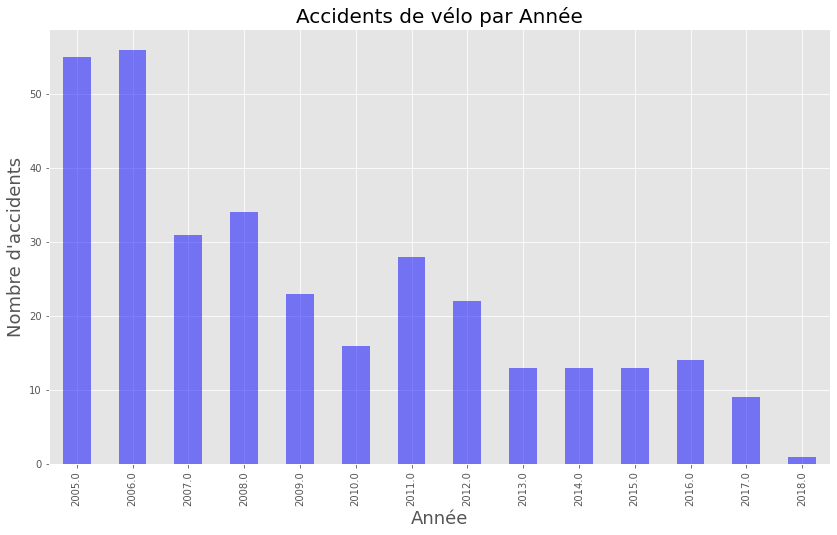

In [14]:
# plot accidents per month
accidents_year.plot(kind='bar',figsize=(14,8), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Accidents de vélo par Année', fontsize=20)
plt.xlabel('Année',fontsize=18)
plt.ylabel("Nombre d'accidents",fontsize=18);
plt.savefig('fig1.png')

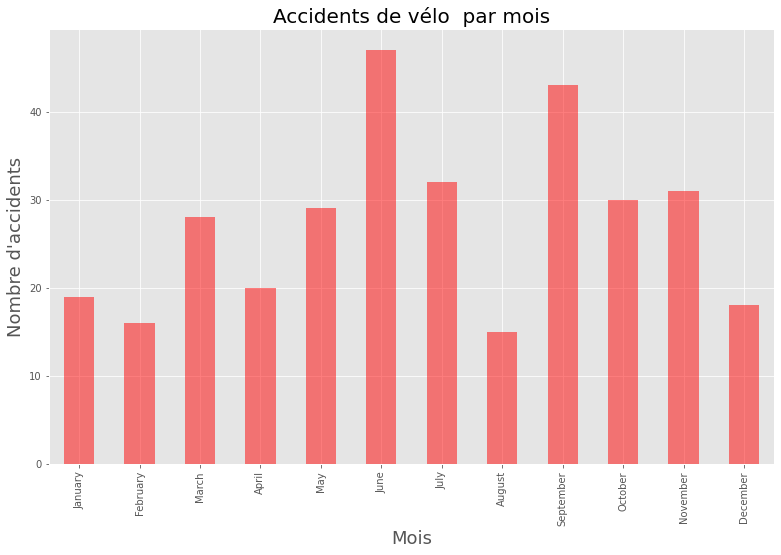

In [15]:


# plot accidents per month
accidents_month.plot(kind='bar',figsize=(13,8), color='red', alpha=0.5)

# title and x,y labels
plt.title('Accidents de vélo  par mois', fontsize=20)
plt.xlabel('Mois',fontsize=18)
plt.ylabel("Nombre d'accidents",fontsize=18);
plt.savefig('fig2.png')

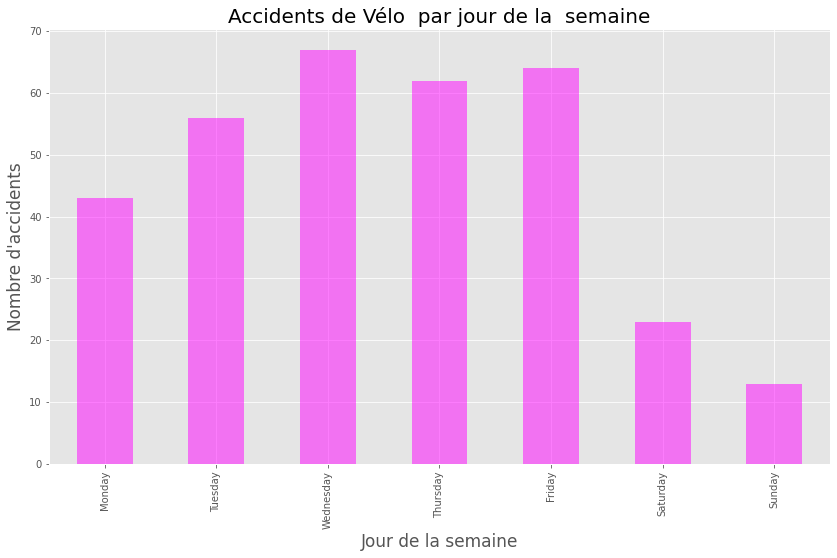

In [16]:
accidents_day = df1.groupby(df1['date'].dt.dayofweek).count().date

# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
accidents_day.plot(kind='bar',figsize=(14,8), color='magenta', alpha=0.5)

# title and x,y labels
plt.title('Accidents de Vélo  par jour de la  semaine', fontsize=20)
plt.xlabel('Jour de la semaine',fontsize=17)
plt.ylabel("Nombre d'accidents" ,fontsize=17);
plt.savefig('fig3.png')

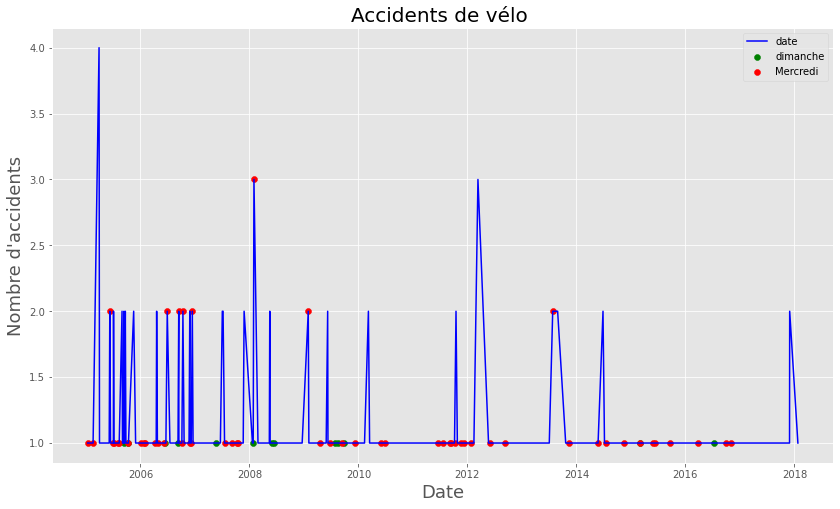

In [24]:
accidents = df1.groupby(df1['date'].dt.date).count().date

accidents.plot(figsize=(14,8), color='blue')

# sunday accidents
sundays = df1.groupby(df1[df1['date'].dt.dayofweek==6].date.dt.date).count().date
plt.scatter(sundays.index, sundays, color='green', label='dimanche')

# friday accidents
wednesday = df1.groupby(df1[df1['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(wednesday.index, wednesday, color='red', label='Mercredi')

# Title, x label and y label
plt.title('Accidents de vélo ', fontsize=20)
plt.xlabel('Date',fontsize=18)
plt.ylabel("Nombre d'accidents",fontsize=18)
plt.legend()
plt.savefig('fig4.png')

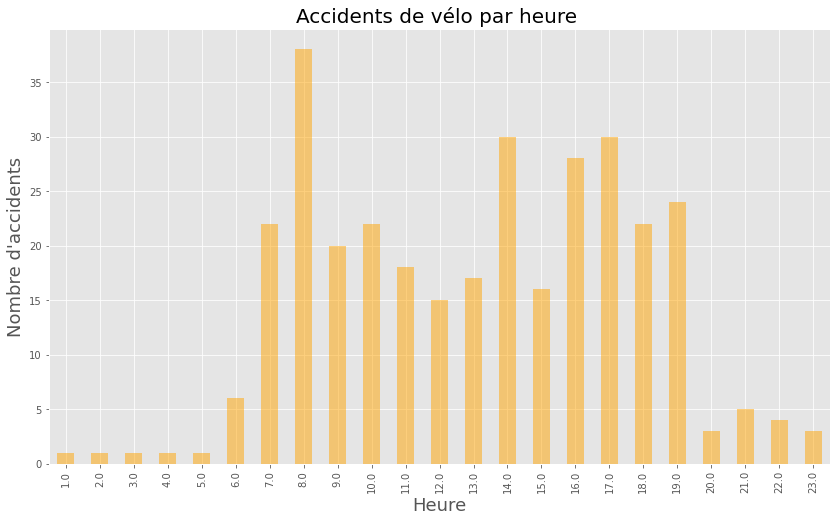

In [25]:
accidents_hour = df1.groupby(df1['date'].dt.hour).count().date
accidents_hour.plot(kind='bar',figsize=(14,8), color='orange', alpha=0.5)

# title and x,y labels
plt.title('Accidents de vélo par heure ', fontsize=20)
plt.xlabel('Heure',fontsize=18)
plt.ylabel("Nombre d'accidents",fontsize=18);
plt.savefig('fig5.png')

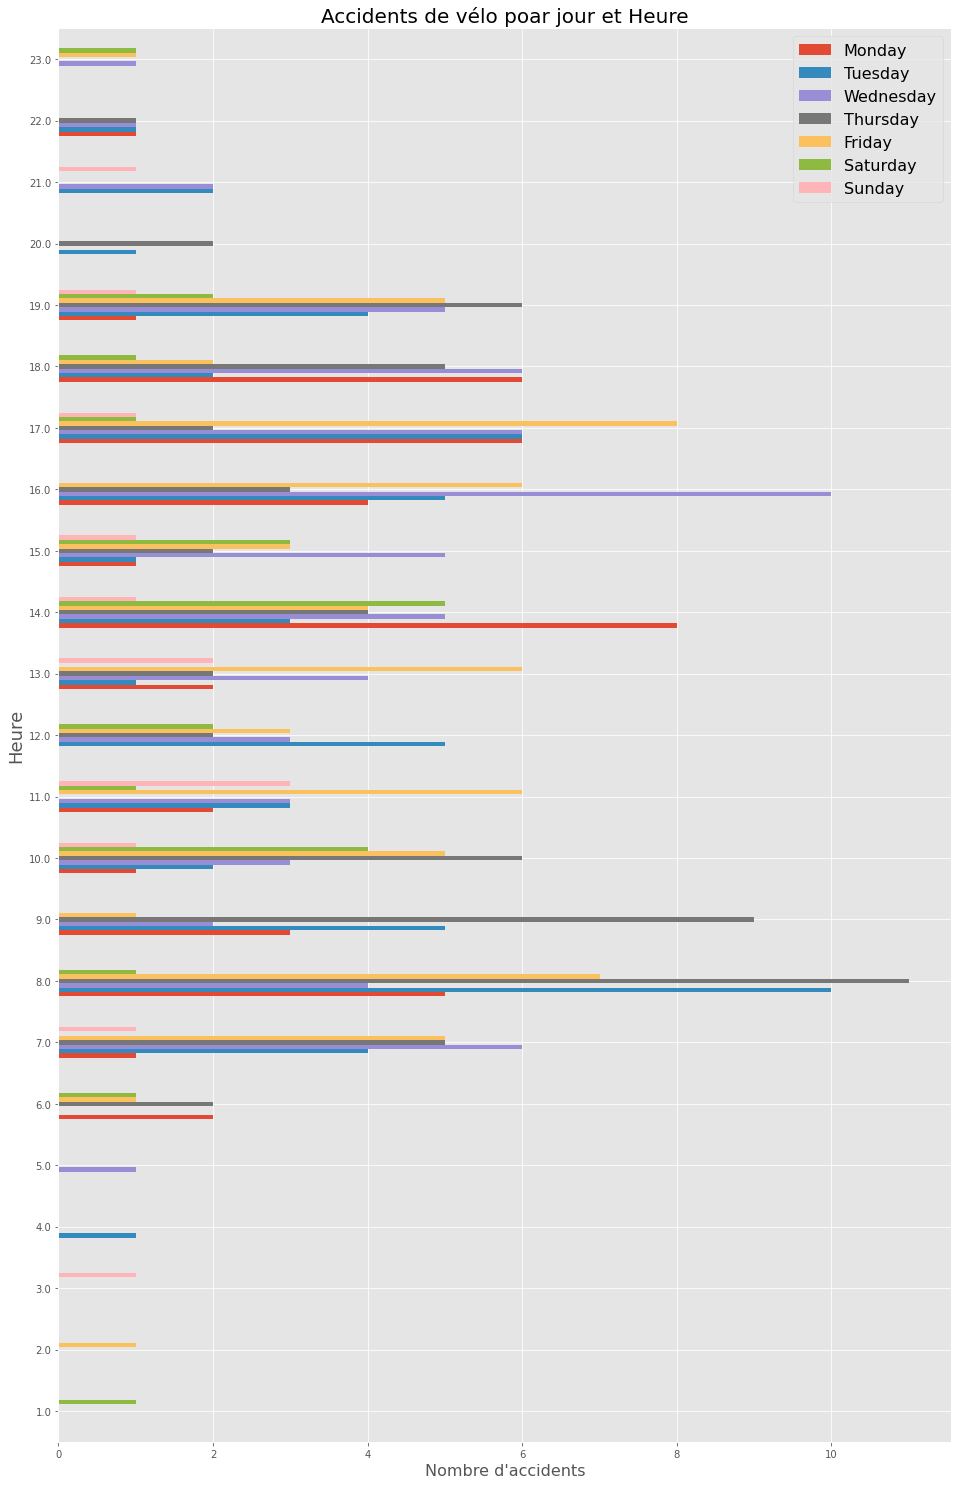

In [26]:
# Number of accident per hour and day
accidents_hour_day = df1.groupby([df1['date'].dt.hour.rename('hour'),df1['date'].dt.dayofweek.rename('day')]).count().date

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents de vélo poar jour et Heure',fontsize=20)
plt.xlabel("Nombre d'accidents",fontsize=16)
plt.ylabel('Heure',fontsize=18); 
plt.savefig('fig6.png')


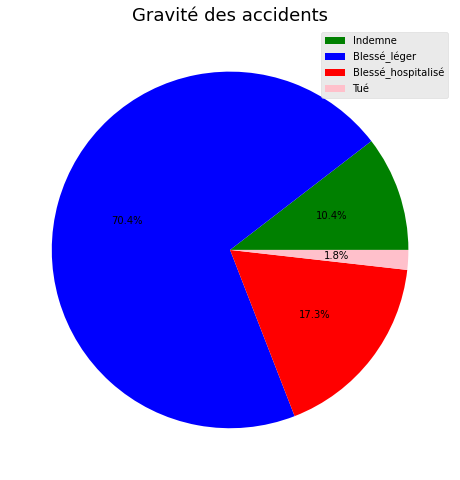

In [27]:
indem =df1.loc[df1['gravite accident'] ==  "0 - Indemne "].count()
léger =df1.loc[df1['gravite accident'] ==  "1 - Blessé léger"].count()
hospital =df1.loc[df1['gravite accident'] ==  "2 - Blessé hospitalisé"].count()
tué =df1.loc[df1['gravite accident'] ==  "3 - Tué"].count()
details = {'Indemne': [35], 
        'Blessé_léger': [236], 
        'Blessé_hospitalisé': [58],
         'Tué' :[6] 
          
          } 
df2=pd.DataFrame(details) 
injuries = df2[['Indemne','Blessé_léger','Blessé_hospitalisé','Tué']].sum()

injuries.plot(kind='pie',figsize=(8.2,8.2), colors=['green','blue','red', 'pink'],labels=None, autopct='%1.1f%%', fontsize=10)
#Legend and title
plt.legend(labels=['Indemne','Blessé_léger','Blessé_hospitalisé','Tué'])
plt.title("Gravité des accidents", fontsize=18)
plt.ylabel('')
plt.savefig('fig7.png')

In [28]:
conn = database.create_connection()
cur = conn.cursor()

cur = database.query_create_select (conn,"select * from accidents_velo_38  where (commune = '38185') ;")

latitude=[]
longitude=[]
for ligne in cur:
    lat=ligne[5]
    lon=ligne[6]
    if  lat !='0' and lon !='0':
        latitude.append(lat)
        longitude.append(lon)
dico={'lat':latitude,'lon':longitude}
df_accidents=pd.DataFrame(dico)






cur= database.query_create_select(conn, "SELECT * FROM  points_noirs ;")
lon= []
lat =[]
for ligne in cur:
    x=ligne[2]
    y=ligne[1]
    lon.append(x)
    lat.append(y)
dico1={"x":lon,"y":lat}
df_points=pd.DataFrame(dico1)

df_accidents=df_accidents.astype(float)



Connecting to the PostgreSQL database...


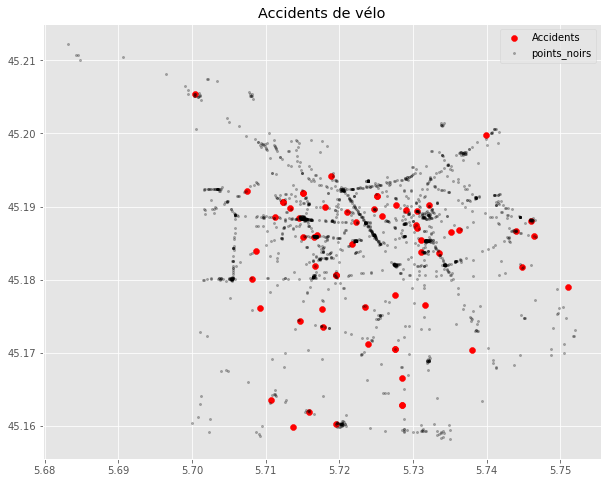

In [29]:
    
df_accidents=df_accidents.astype(float)

plt.figure(figsize=(10,8))
plt.scatter(df_accidents['lon'],df_accidents['lat'],c='red',label="Accidents" )
plt.scatter(df_points.x,df_points.y,s=5,alpha=0.3,c='black',label="points_noirs")
plt.legend()
plt.title("Accidents de vélo")
plt.savefig('fig8.png')

In [23]:
print(df1)

       identifiant accident                date           mois          jour  \
136            200500003397 2005-01-13 07:00:00   01 - janvier     3 - jeudi   
137            200500003400 2005-01-14 17:00:00   01 - janvier  4 - vendredi   
141            200500003415 2005-01-25 09:00:00   01 - janvier     1 - mardi   
339            200500007846 2005-02-18 17:00:00   02 - février  4 - vendredi   
637            200500015267 2005-03-30 17:00:00      03 - mars  2 - mercredi   
...                     ...                 ...            ...           ...   
60666          201700027675 2017-11-07 11:00:00  11 - novembre     1 - mardi   
60667          201700027683 2017-11-29 11:00:00  11 - novembre  2 - mercredi   
60668          201700027686 2017-11-30 19:00:00  11 - novembre     3 - jeudi   
60669          201700027686 2017-11-30 19:00:00  11 - novembre     3 - jeudi   
64862          201800025689 2018-01-24 14:00:00   01 - janvier  2 - mercredi   

       heure departement commune       